In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv('Kaggle_Salary.csv', skiprows = [1])
salary.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (209,323,372,385,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
1,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
2,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
3,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0
4,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4.0


In [3]:
salary['index'] = salary['index'].astype(int)
salary.set_index('index')
df = salary.drop(columns=['Unnamed: 0', 'index'])

newDF = pd.DataFrame()

for col in df:
    
    # For numerical features
    if df[col].dtypes != 'object':        
        if "OTHER" in col or "TEXT" in col:
            continue
        else:
            newDF[col] = df[col]
            continue
    
    cate = df[col].value_counts()
    cate_num = cate.size
      
    # For categorical features
    if(cate_num <= 0 or cate_num >= 70):
        continue
        
    # Only one category, encode feature as 1 and nan value as 0
    if(cate_num == 1):
        name = col + "_" + cate.index[0]
        newDF[name] = df[col].notnull().astype('int')
    
    # Multiple categories, using One Hot Encoder
    if(cate_num > 1):
        dummies = pd.get_dummies(df[col], prefix = col)
        newDF = pd.concat([newDF, dummies], axis=1, sort=False)

In [5]:
newDF = newDF.drop(columns=['Q38_Part_19', 'Q38_Part_20','Time from Start to Finish (seconds)'])
newDF = newDF.dropna()

In [7]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

cols = ['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6','Q35_Part_1','Q35_Part_2','Q35_Part_3','Q35_Part_4','Q35_Part_5','Q35_Part_6']

for col in cols:
    newDF[col] = scaler.fit_transform(newDF[[col]])

In [11]:
df_US = newDF[newDF['Q3_United States of America'] == 1]

In [12]:
X = df_US.drop(columns=['Q9']).values
y = df_US["Q9"].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,8,4), random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [129]:
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 0.759107
Test set score: 0.370796


'squared_loss'

In [135]:
start  = 2
stop = 100
step = 1
layers = [(x, ) for x in range(start, stop, step)]
result = []

for layer in layers:
    clf.set_params(hidden_layer_sizes=layer)
    clf.fit(X_train, y_train)
    train_acurr = clf.score(X_train, y_train)
    test_acurr = clf.score(X_test, y_test)
    result.append((layer, train_acurr, test_acurr))
    
df1 = pd.DataFrame(result,columns=['hidden layer','acurr_train','acurr_test'])
display(pd.DataFrame(df))

,hidden layer,acurr_train,acurr_test
0,"(2, 2, 2)",0.000000,-0.000189
1,"(2, 2, 3)",0.000000,-0.000189
2,"(2, 3, 2)",0.000000,-0.000189
3,"(2, 3, 3)",0.746143,0.210311
4,"(3, 2, 2)",0.908406,0.115855
5,"(3, 2, 3)",0.932197,-0.253757
6,"(3, 3, 2)",0.732621,0.282124
7,"(3, 3, 3)",0.944115,-1.993655


In [139]:
display(df1)

,hidden layer,acurr_train,acurr_test
0,"(2,)",0.718180,0.304543
1,"(3,)",0.885357,0.164030
2,"(4,)",0.928588,-0.800658
3,"(5,)",0.999594,-0.323809
4,"(6,)",0.957684,-1.033398
5,"(7,)",0.723578,0.293706
6,"(8,)",0.973052,-0.310097
7,"(9,)",0.724902,0.288676
8,"(10,)",0.920476,-0.429211
9,"(11,)",0.986548,-0.290347


In [149]:
from IPython.display import display

start  = 2
stop = 4
step = 1
layers = [(x, y, z) for x in range(start, stop, step) for y in range(start, stop, step) for z in range(start, stop, step)]
result = []

for layer in layers:
    clf.set_params(hidden_layer_sizes=layer)
    clf.fit(X_train, y_train)
    train_acurr = clf.score(X_train, y_train)
    test_acurr = clf.score(X_test, y_test)
    result.append((layer, train_acurr, test_acurr))
    
df = pd.DataFrame(result,columns=['hidden layer','acurr_train','acurr_test'])
display(pd.DataFrame(df))


,hidden layer,acurr_train,acurr_test
0,"(2, 2, 2)",0.000000,-0.000189
1,"(2, 2, 3)",0.000000,-0.000189
2,"(2, 3, 2)",0.000000,-0.000189
3,"(2, 3, 3)",0.746143,0.210311
4,"(3, 2, 2)",0.908406,0.115855
5,"(3, 2, 3)",0.932197,-0.253757
6,"(3, 3, 2)",0.732621,0.282124
7,"(3, 3, 3)",0.944115,-1.993655


In [150]:
df_sorted = df.sort_values(by= ['acurr_test'],ascending=False )
df.shape[0]

8

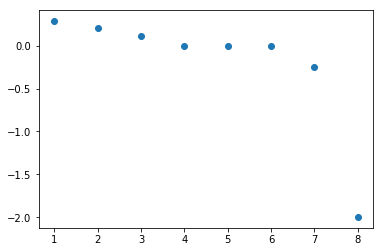

In [151]:
plt.scatter( range(1,9), df_sorted['acurr_test'])

In [157]:
df.iloc[0]['acurr_test']

-0.0001893677798487925

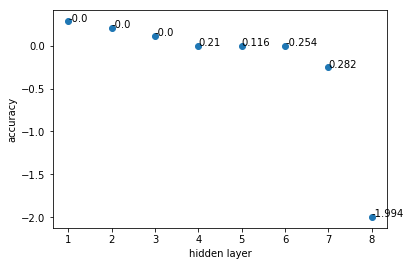

In [164]:
ar = range(1, df.shape[0]+1)

plt.scatter(ar, df_sorted['acurr_test'])
plt.xlabel('hidden layer')
plt.ylabel('accuracy')
for i in range(0,8):
    plt.annotate(float("{0:.3f}".format(df.iloc[i]['acurr_test'])), (ar[i], df_sorted.iloc[i]['acurr_test']))
plt.show()
